In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

from PIL import Image

import glob
from scipy.misc import imread
from skimage.transform import resize
import pandas as pd

from scipy.stats import mode

In [3]:
df = pd.read_csv('../Data/Renewals-Prices.csv')
closest = df['closestRooftop'].as_matrix()
closest = closest[:, None]

nearby = df['rooftopsNearby'].as_matrix()
nearby = nearby[:, None]

area = df['area'].as_matrix()
area = area[:, None]

lv = df['CurrentValue'].as_matrix()
lv = lv[:, None]

In [4]:
nearby.max()

8

In [19]:
images = glob.glob('../Imgs/Layers/*.png')
no_of_images = len(images)
w, h = 530, 809
dataset = np.zeros((no_of_images, w, h))
print(dataset.shape)
for idx, img_file in enumerate(images):
    img = imread(img_file, 'L')
    dataset[idx] = img

(335, 530, 809)


In [33]:
# d2 = dataset.reshape((len(images), -1))
reduced = TSNE(random_state=RS).fit_transform(lv)

reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))

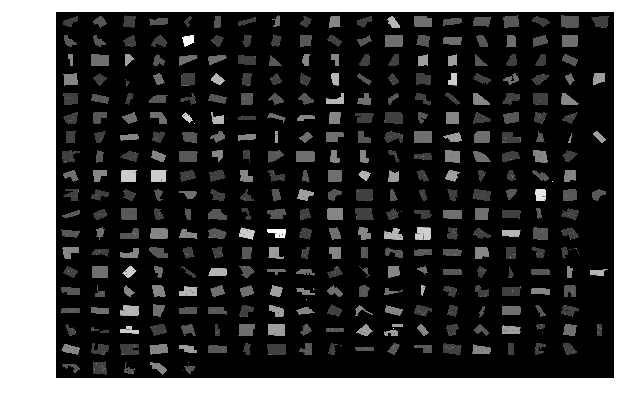

In [35]:
# draw all images in a merged image
image_width = w
image_height = h
merged_width = int(np.ceil(np.sqrt(no_of_images)) * image_width)
merged_height = int(np.ceil(np.sqrt(no_of_images)) * image_height)
merged_image = np.zeros((merged_width, merged_height), dtype='uint8')
ellipside=False
for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_height-image_height-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_height) + 1)
        if merged_image[a,b] != 0:
            continue
        img = dataset[index]
        merged_image[a:a+image_width, b:b+image_height] = img.astype(np.uint8)
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
        img = dataset[index]
        merged_image[a*image_width:(a+1)*image_width, b*image_height:(b+1)*image_height] = img

plt.figure(figsize=(10, 10))
plt.imshow(merged_image, cmap='gray')
plt.axis('off')
plt.savefig('matplotlib-ellipsoid.png', bbox_inches='tight')

# merged_image = Image.fromarray(merged_image)
# if ellipside:
#     merged_image.save('merged-ellipsoide.png')
# else:
#     merged_image.save('merged-distances.png')


In [10]:
images = glob.glob('../Imgs/LayersBGZoom1,5/*.png')
no_of_images = len(images)
w, h = 530, 809
dataset = np.zeros((no_of_images, w, h, 3))
print(dataset.shape)
for idx, img_file in enumerate(images):
    img = imread(img_file)
    dataset[idx] = img[:,:,:3]

(335, 530, 809, 3)


In [6]:
# d2 = dataset.reshape((len(images), -1))
reduced = TSNE(random_state=RS).fit_transform(nearby)

reduced_transformed = reduced - np.min(reduced, axis=0)
reduced_transformed /= np.max(reduced_transformed, axis=0)
image_xindex_sorted = np.argsort(np.sum(reduced_transformed, axis=1))

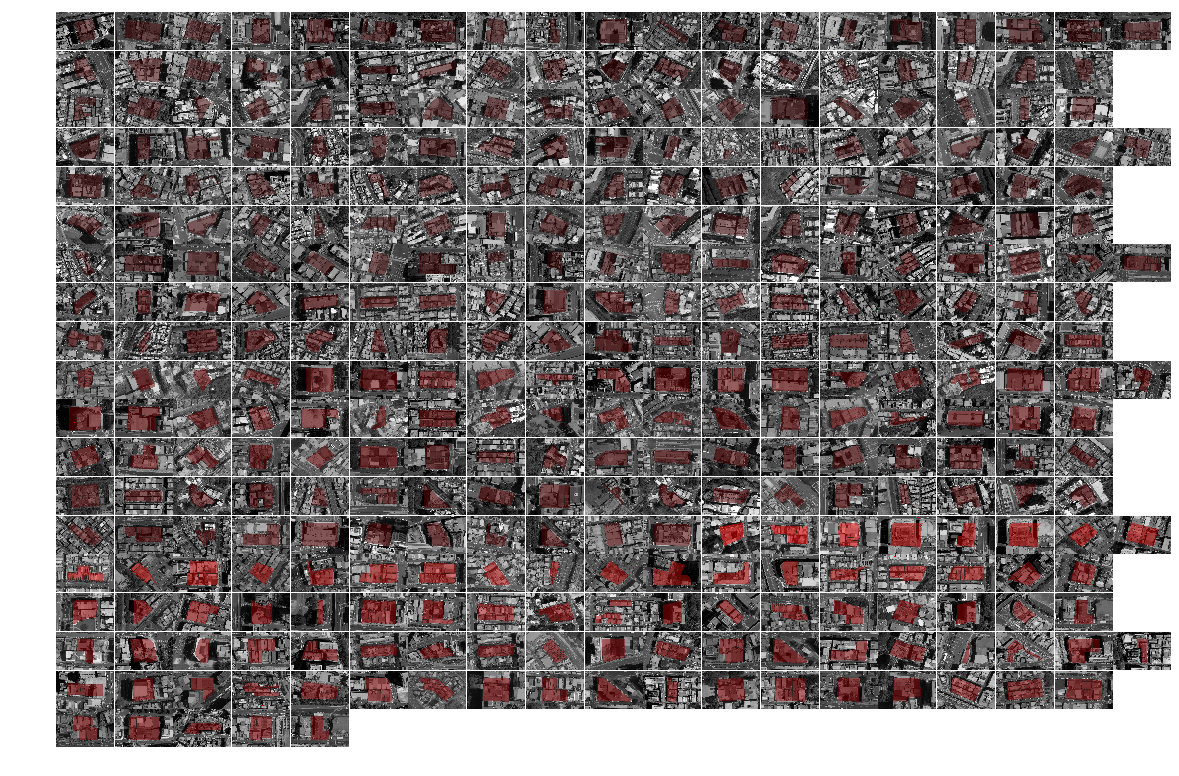

In [11]:
# draw all images in a merged image
image_width = w
image_height = h
extra=10
merged_width = int(np.ceil(np.sqrt(no_of_images)) * (image_width+extra))
merged_height = int(np.ceil(np.sqrt(no_of_images)) * (image_height+extra))
merged_image = np.ones((merged_width, merged_height, 3), dtype='uint8') * 255
ellipside=False
for counter, index in enumerate(image_xindex_sorted):
    # set location
    if ellipside:
        a = np.ceil(reduced_transformed[counter, 0] * (merged_width-image_width-1)+1)
        b = np.ceil(reduced_transformed[counter, 1] * (merged_height-image_height-1)+1)
        a = int(a - np.mod(a-1,image_width) + 1)
        b = int(b - np.mod(b-1,image_height) + 1)
        if merged_image[a,b, 0] != 0:
            continue
        img = dataset[index]
        merged_image[a:a+image_width, b:b+image_height,:] += img[:,:,:3].astype(np.uint8)
    else:
        b = int(np.mod(counter, np.sqrt(no_of_images)))
        a = int(np.mod(counter//np.sqrt(no_of_images), np.sqrt(no_of_images)))
        img = dataset[index]
        merged_image[a*(image_width+extra):(a+1)*image_width + a*extra, b*(image_height+extra):(b+1)*image_height + b*extra,:] = img[:,:,:3]

plt.figure(figsize=(20, 20))
plt.imshow(merged_image)
plt.axis('off')
plt.show()
# merged_image = Image.fromarray(merged_image)
# if ellipside:
#     merged_image.save('merged-ellipsoide.png')
# else:
#     merged_image.save('merged.png')


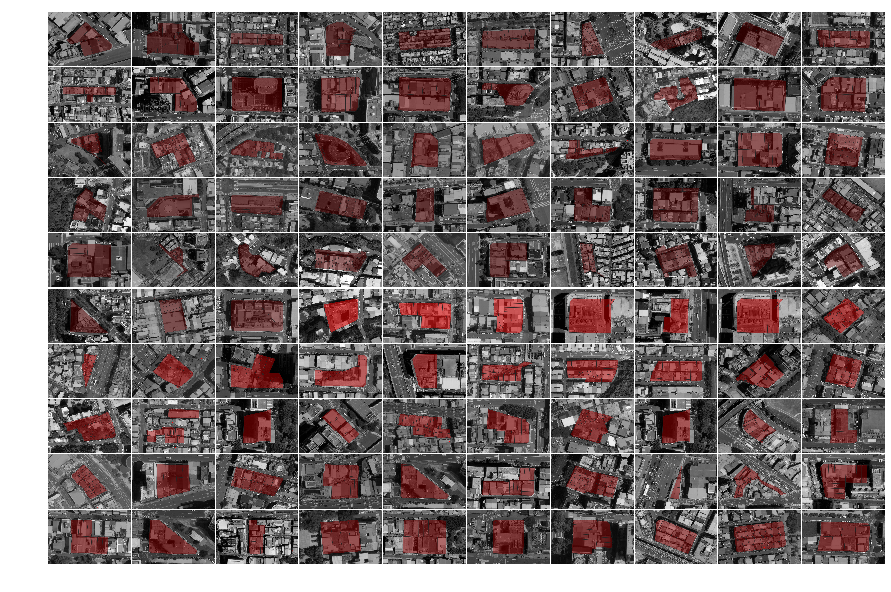

In [12]:
plt.figure(figsize=(15, 15))
merged_image_tiny = merged_image[8*(image_width+extra):18*image_width+17*extra, 8*(image_height+extra):18*image_height+17*extra,:]
plt.imshow(merged_image_tiny)
plt.axis('off')
merged_image_tiny = Image.fromarray(merged_image_tiny)
merged_image_tiny.save('BWMAP.png')